# Author - Ishita Jain¶

# Data Science Intern at Lets Grow More LGMVIP March 23


# Beginner Level Task

# Task 2- Stock market prediction and forecasting using stacked LSTM

# Step1:- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step2:- Loading Dataset

In [2]:
data = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(data)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
df.shape

(2035, 8)

In [5]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [6]:
#Checking the null value in dataset
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

# Step3:- Visualizing the data

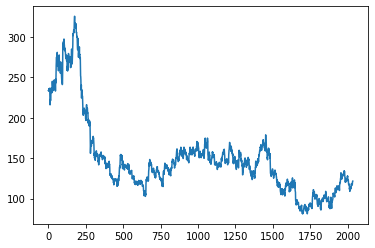

In [7]:
#plot the Close value graph 
plt.plot(df['Close'])
plt.show()

# Step4:- MinMax Scaler

In [8]:
df1 = df.reset_index()['Close']

In [9]:
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [10]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Step5:- Train Test Split

In [12]:
train_size = int(len(df1) * 0.7)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:1]

In [13]:
train_data.shape

(1424, 1)

In [14]:
test_data.shape

(611, 1)

In [15]:
def dataset(df, step = 1):
    Xdata, ydata = [], []
    for i in range(len(df) - step - 1):
        a = df[i:(i+step), 0]
        Xdata.append(a)
        ydata.append(df[i+step,0])
    return np.array(Xdata), np.array(ydata)

In [16]:
step = 100
X_train, y_train = dataset(train_data, step)
X_test, y_test = dataset(test_data, step)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
X_train.shape

(1323, 100, 1)

In [19]:
X_test.shape

(510, 100, 1)

In [20]:
y_train.shape

(1323,)

In [21]:
y_test.shape

(510,)

# Step6:- Creating a stacked LSTM Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Step7:- Compile and training

In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.fit(X_train,y_train,validation_split=0.1,epochs=100)

Epoch 1/100
38/38 [==============================] - 11s 134ms/step - loss: 0.0130 - val_loss: 0.0013
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0015 - val_loss: 8.9261e-04
Epoch 6/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0013 - val_loss: 7.4420e-04
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0013 - val_loss: 7.0246e-04
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0010 - val_loss: 6.7858e-04
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss

38/38 [==============================] - 4s 113ms/step - loss: 2.2162e-04 - val_loss: 2.7347e-04
Epoch 77/100
38/38 [==============================] - 5s 126ms/step - loss: 2.9553e-04 - val_loss: 1.6603e-04
Epoch 78/100
38/38 [==============================] - 5s 123ms/step - loss: 2.5009e-04 - val_loss: 3.5072e-04
Epoch 79/100
38/38 [==============================] - 4s 111ms/step - loss: 2.3671e-04 - val_loss: 1.3792e-04
Epoch 80/100
38/38 [==============================] - 4s 112ms/step - loss: 2.0868e-04 - val_loss: 1.3585e-04
Epoch 81/100
38/38 [==============================] - 5s 123ms/step - loss: 2.1958e-04 - val_loss: 1.5409e-04
Epoch 82/100
38/38 [==============================] - 5s 121ms/step - loss: 2.6645e-04 - val_loss: 1.4380e-04
Epoch 83/100
38/38 [==============================] - 4s 111ms/step - loss: 2.0464e-04 - val_loss: 1.3536e-04
Epoch 84/100
38/38 [==============================] - 4s 115ms/step - loss: 2.1296e-04 - val_loss: 1.4160e-04
Epoch 85/100
38/38 [===

# Step8:- Prediction and Testing

In [30]:
train_data_predict = model.predict(X_train)
test_data_predict = model.predict(X_test)

16/16 [==============================] - 1s 38ms/step


In [31]:
#Transform back to original form
train_data_predict=scaler.inverse_transform(train_data_predict)
test_data_predict=scaler.inverse_transform(test_data_predict)

In [32]:
#Calculate RMSE on train data
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_data_predict))

165.50057103343343

In [34]:
#Calculate RMSE on test data
np.sqrt(mean_squared_error(y_test,test_data_predict))

107.20022617853576

# Step9:- Plotting the graph against actual data and prediction data

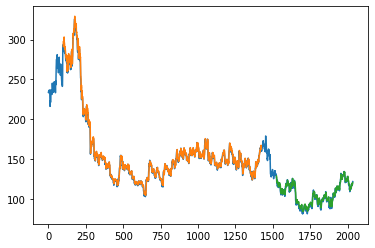

In [37]:
# train predictions 
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_data_predict)+look_back, :] = train_data_predict
# test predictions
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_data_predict)+(look_back*2)+1:len(df1)-1, :] = test_data_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Step10:- Prediction for the next 10 days

In [29]:
len(test_data)

611

In [38]:
predict_input = test_data[511:].reshape(1,-1)
predict_input

array([[0.12479575, 0.13848039, 0.14011438, 0.13888889, 0.13541667,
        0.14011438, 0.1380719 , 0.13071895, 0.13071895, 0.12867647,
        0.11846405, 0.14644608, 0.14808007, 0.15910948, 0.15992647,
        0.15788399, 0.16441993, 0.17892157, 0.17933007, 0.19260621,
        0.20812908, 0.18974673, 0.18055556, 0.18239379, 0.17708333,
        0.17810458, 0.18055556, 0.17810458, 0.17851307, 0.19607843,
        0.18913399, 0.18954248, 0.19403595, 0.19444444, 0.20200163,
        0.19771242, 0.19934641, 0.19873366, 0.1997549 , 0.2128268 ,
        0.21568627, 0.20445261, 0.21772876, 0.21098856, 0.21425654,
        0.19750817, 0.18811275, 0.17851307, 0.17381536, 0.16033497,
        0.16564542, 0.17116013, 0.17422386, 0.18035131, 0.17401961,
        0.16278595, 0.16973039, 0.17810458, 0.17034314, 0.16830065,
        0.17279412, 0.17544935, 0.18382353, 0.19138072, 0.18913399,
        0.19097222, 0.17238562, 0.16830065, 0.1693219 , 0.17177288,
        0.16156046, 0.14971405, 0.1503268 , 0.15

In [39]:
predict_input.shape

(1, 100)

In [40]:
temp_input = list(predict_input)
temp_input = temp_input[0].tolist()

In [42]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [46]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        predict_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,predict_input))
        predict_input=predict_input.reshape(1,-1)
        predict_input = predict_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(predict_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        predict_input = predict_input.reshape((1, n_steps,1))
        yhat = model.predict(predict_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522

In [48]:
#Plotting last 110 days Closing Price
day_new = np.arange(1,101)
day_pred = np.arange(101,111)

In [49]:
len(df1)

2035

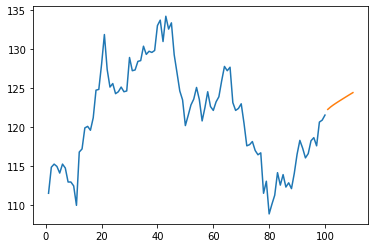

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

In [52]:
#Make a continoue graph
df2=df1.tolist()
df2.extend(lst_output)

In [53]:
len(df2)

2045

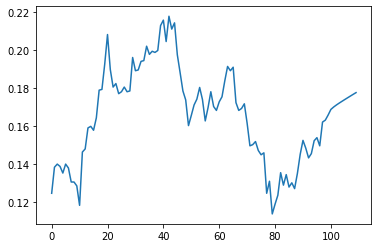

In [55]:
plt.plot(df2[1935:])
plt.show()

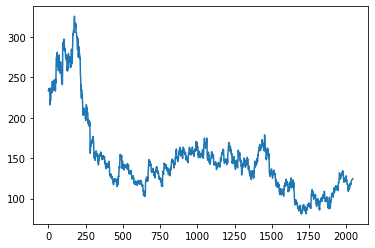

In [56]:
#Plotting the graph with predicted 10 days output
df2=scaler.inverse_transform(df2).tolist()
plt.plot(df2)
plt.show()